# A NEW CHARACTERISATION OF CONVEX ORDER THROUGH THE 2-WASSERSTEIN DISTANCE - - BAYESIAN OPTIMIZATION

**Authors: Johannes Wiesel and Erica Zhang**

**Version: Dec. 5th, 2022**

*Columbia University*

### Introduction

We develop new computational methods for invesgating convex order using the 2-Wasserstein distance $\mathcal{W}_2$, as discussed in paper: https://arxiv.org/abs/2207.01235. In this Main File, we will plot four sample examples using each of the three sampling optimization methods in the 'Optimization' package. That is: 

 - $\textbf{Indirect Dirichlet with histograms}$: Using Dirichlet distribution to model the probability of a discretized support of an optimal measure $\mathbf{\rho}$, this method samples for $\mathbf{\rho}$ with all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$) represented as histograms, or sample weights.
 - $\textbf{Indirect Dirichlet with samples}$: Using Dirichlet distribution to model the probability of a discretized support of an optimal measure $\mathbf{\rho}$, this method samples for $\mathbf{\rho}$ with all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$) represented as samples. In this method, we assume uniform distribution (i.e. uniform weights) on samples.
 - $\textbf{Direct randomized Dirichlet with samples}$: Using Dirichlet method to model the optimal measure $\mathbf{\rho}$ itself, this method samples for an optimal measure $\mathbf{\rho}$ by randomly selecting a sample set for $\mathbf{\rho}$ given requested target sample size for $\mathbf{\rho}$ and dimension. In this method, all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$) represented as samples and we assume uniform distribution (i.e. uniform weights) on samples.
 
We compare the results obtained using each method and we also compare and analyze the runtime of each method.

### Definition

Given two source distributions $\mathbf{a}$ and $\mathbf{b}$, an optimal measure $\mathbf{\rho}$ is defined to be a probability measure with domain $[-1,1]$ in all dimensions that solves the minimization problem:

$$\min_{\mathbf{\rho}} \{ - \min_{\gamma_1} \{\langle \gamma_a, \mathbf{M_a} \rangle_{\textit{F}} \} +  \min_{\gamma_b} \{\langle \gamma_b, \mathbf{M_b} \rangle_{\textit{F}} \}\} \hspace{1cm} (1)$$

$$\textbf{s.t.} \hspace{0.2cm} \gamma_a\mathbf{1} = \mathbf{a}$$
$$\gamma_a^{\textit{T}}\mathbf{1} = \mathbf{\rho}$$
$$\gamma_b\mathbf{1} = \mathbf{b}$$
$$\gamma_b^{\textit{T}}\mathbf{1} = \mathbf{\rho}$$
$$\gamma_a,\gamma_b \geq 0$$


where:
 - $\mathbf{M_a}$ is the squared euclidean metric cost matrix from source measure $\mathbf{a}$ to measure $\mathbf{\rho}$.
 - $\mathbf{M_b}$ is the squared euclidean metric cost matrix from source measure $\mathbf{b}$ to measure $\mathbf{\rho}$.
 - $\mathbf{a},\mathbf{b},\mathbf{\rho}$ are represented as sample weights.
 
 And the "minimal Wasserstein distance" refers to the solution of the minimization problem (1). 

### Import Dependencies 

In [1]:
# 0.1 runtime package
import time
# 0.2 helper packages
from Histograms import *
from bayesian import *
from plotting_rho import *
# 0.3 table package
from tabulate import tabulate

### Plot Examples 1.1

For $d = 1$, take two source distributions: $\mu = \mathcal{N}(0,\sigma^2)$ and $\nu = \mathcal{N}(0, 1)$ and plot variance $\sigma^2 \in [0,2]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the sample mean of the minimal Wasserstein distance obtained through each of the four optimization sampling methods described above with a filled-in 95% confidence band (y-axis) with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".

In [21]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# x-axis (variance): here we start at 0.1 since variance = 0 incurs calculation problems with the 1D gaussian histogram
x = np.linspace(0.1,2,g)
# partition size of rho's support for non-dirichlet methods
p = 10


# source_b histogram
b_result = gauss1D(size_b,0,1)
b_hist = b_result[1]
# source_b grid
b_grid = b_result[0]
# source_b samples
b_samples = np.random.normal(0, 1, size=size_b)
# source_a grid
a_grid = np.arange(size_a, dtype=np.float64)-size_a/2 # Question: should we fix a_grid or let it vary?

# create lists
y_hist = []
y_samples = []
y_dir = []
hist_method_time = []
samples_method_time = []
dir_method_time = []

for i in range(g):
    a_result = gauss1D(size_a,0,x[i])
    a_hist = a_result[1]
    a_samples = np.random.normal(0, x[i], size=size_a)
    
    # 1. Histogram Method
    start_time = time.time()
    result = bayesian_optimization(method = "hist", p=p, a = a_hist, b=b_hist, a_grid = a_grid, b_grid = b_grid, max_eval = 200,as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    hist_method_time.append(runtime)
    min_loss = result[0][0]
    y_hist.append(min_loss)
    
    # 2. Samples Method
    start_time = time.time()
    result = bayesian_optimization(method = "samples", p=p, a = a_samples, b=b_samples, max_eval = 200, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    samples_method_time.append(runtime)
    min_loss = result[0][0]
    y_samples.append(min_loss)
    
    # 3. Dirichlet (Random Selection) Method
    start_time = time.time()
    result = bayesian_optimization(method = "dir",p=p, a = a_samples, b=b_samples, max_eval = 200, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    dir_method_time.append(runtime)
    min_loss = result[0][0]
    y_dir.append(min_loss)
    
    
# conversion to ndarray
y_hist = np.array(y_hist)
y_samples = np.array(y_samples)
y_dir = np.array(y_dir)

hist_method_time = np.array(hist_method_time)
samples_method_time = np.array(samples_method_time)
dir_method_time = np.array(dir_method_time)

100%|██████████| 200/200 [00:33<00:00,  5.95trial/s, best loss: -0.12276031233842569]


Now, we plot minimal Wasserstein distance under optimal measure $\rho$ obtained through each of the four optimization sampling methods (y-axis) against (discretized) variance (x-aixs).

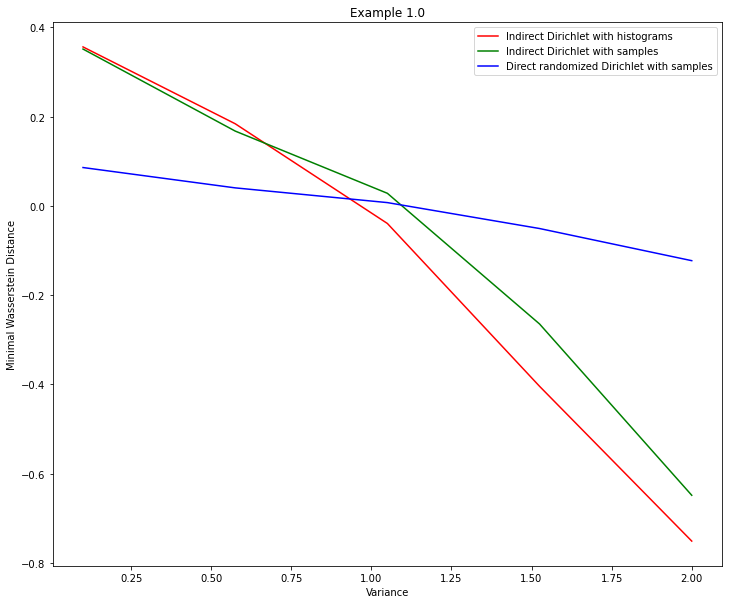

In [22]:
# Plot four curves in one graph (problem with bayesian is too uncertain: not the greater the max_eval the better: more likely to find minimal values)

# Plotting the curves simultaneously
pl.plot(x, y_hist, color='r', label='Indirect Dirichlet with histograms')
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.0")

# Adding legend
pl.legend()

# Adjust Size
pl.rcParams['figure.figsize'] = [12, 10]

# load the display window
pl.show()

### Plot Examples 1.2

For $d = 2$, take two source distributions: $\mu = \mathcal{N}(0,\sigma^2\textit{I})$ and $\nu = \mathcal{N}(0, \textit{I})$, plot variance $\sigma^2 \in [0,2]\times[0,2]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the minimal Wasserstein distance sample mean (y-axis) obtained through each of the three optimization sampling methods described above (excluding the "Histogram Method") with a filled-in 95% confidence band with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 

In [8]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# x-axis (variance): here we start at 0.1 since variance = 0 incurs calculation problems with the 1D gaussian histogram
x = np.linspace(0.1,2,g)
# partition size of rho's support for non-dirichlet methods
p = 10

# source_b samples
mu_b = np.array([0, 0])
cov_b = np.array([[1, 0], [0, 1]])
b_samples = ot.datasets.make_2D_samples_gauss(size_b, mu_b, cov_b)

# source_a mean is fixed at origin
mu_a = np.array([0, 0])

# create lists
y_samples = []
y_dir = []
samples_method_time2 = []
dir_method_time2 = []


for i in range(g):
    
    # generate samples for source_a distribution
    cov_a = np.array([[x[i], 0], [0, x[i]]])
    a = ot.datasets.make_2D_samples_gauss(size_a, mu_a, cov_a)    

    # 1. Generate graph for Sample method
    start_time = time.time()
    result = bayesian_optimization(method = "samples",p=p, a = a, b=b_samples, max_eval = 100, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    samples_method_time2.append(runtime)
    min_loss = result[0][0]
    y_samples.append(min_loss)

    # 2. Generate graph for Dirichlet (random selection) method
    start_time = time.time()
    result = bayesian_optimization(method = "dir",p=p, a = a, b=b_samples, max_eval = 100, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    dir_method_time2.append(runtime)
    min_loss = result[0][0]
    y_dir.append(min_loss)

    
# conversion to ndarray
y_samples = np.array(y_samples)
y_dir = np.array(y_dir)

samples_method_time2 = np.array(samples_method_time2)
dir_method_time2 = np.array(dir_method_time2)


100%|██████████| 100/100 [02:17<00:00,  1.37s/trial, best loss: -0.11142505378464695]


Now, we plot optimal measure $\rho$ obtained through each of the three optimization sampling methods (y-axis) against (discretized) variance (x-aixs).

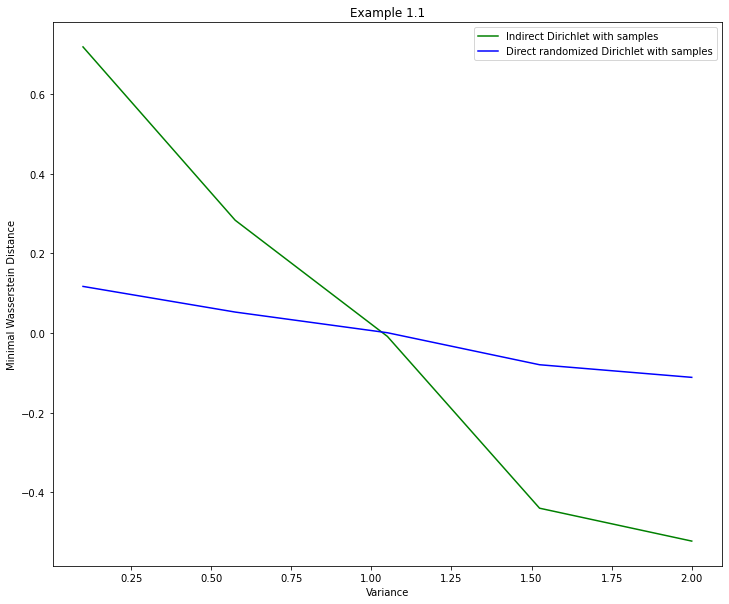

In [9]:
# Plot three curves in one graph

# Plotting the curves simultaneously
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.1")

# Adding legend
pl.legend()

# Adjust Size
pl.rcParams['figure.figsize'] = [12, 10]

# To load the display window
pl.show()

### Plot Examples 2.1

For $d = 1$, take two source distributions: $\mu = \frac{1}{2}(\delta_{-1-s}+\delta_{1+s})$ and $\nu = \frac{1}{2}(\delta_{-1}+\delta_{1})$, plot $s \in [-1,1]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the minimal Wasserstein distance sample mean obtained through each of the four optimization sampling methods described above with a filled-in 95% confidence band (y-axis) with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".

In [11]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# x-axis
x = np.linspace(-1,1,g)
# partition size of rho's support for non-dirichlet methods
p = 10

# source_b histogram and grid
result_b = combined_dirac(x = [-1,1], n = size_b)
b_grid = result_b[0]
b_hist = result_b[1]
# source_b samples
b_samples = random.choice([-1,1],size_b)

# create lists
y_hist = []
y_samples = []
y_dir = []
hist_method_time3 = []
samples_method_time3 = []
dir_method_time3 = []


for i in range(g):
    a_result = combined_dirac(x = [-1-x[i],1+x[i]], n = size_a)
    a_grid = a_result[0]
    a_hist = a_result[1]
    
    # 1. Histogram Method
    # 1. Histogram Method
    start_time = time.time()
    result = bayesian_optimization(method = "hist",p=p, a = a_hist, b=b_hist, a_grid = a_grid, b_grid = b_grid, max_eval = 200,as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    hist_method_time3.append(runtime)
    min_loss = result[0][0]
    y_hist.append(min_loss)
    
    a_samples = random.choice([-1-x[i],1+x[i]],size_a)
    
    # 2. Samples Method
    start_time = time.time()
    result = bayesian_optimization(method = "samples",p=p, a = a_samples, b=b_samples, max_eval = 200, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    samples_method_time3.append(runtime)
    min_loss = result[0][0]
    y_samples.append(min_loss)
    
    # 3. Dirichlet (Random Selection) Method
    start_time = time.time()
    result = bayesian_optimization(method = "dir",p=p, a = a_samples, b=b_samples, max_eval = 200, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    dir_method_time3.append(runtime)
    min_loss = result[0][0]
    y_dir.append(min_loss)



y_hist = np.array(y_hist)
y_samples = np.array(y_samples)
y_dir = np.array(y_dir)
hist_method_time3 = np.array(hist_method_time3)
samples_method_time3 = np.array(samples_method_time3)
dir_method_time3 = np.array(dir_method_time3)

100%|██████████| 200/200 [00:33<00:00,  6.01trial/s, best loss: -0.12340883279915338]


Now, we plot minimal Wasserstein distance under optimal measure $\rho$ obtained through each of the four optimization sampling methods (y-axis) against (discretized) parameter 's' (x-aixs).

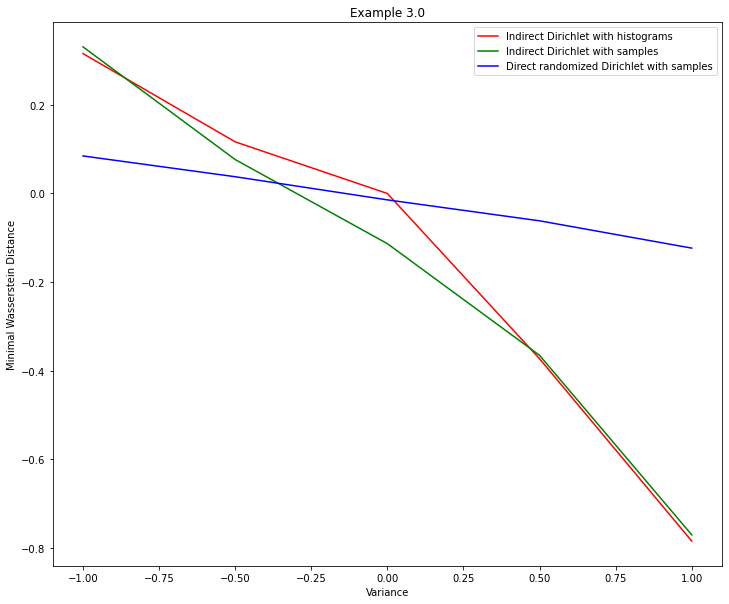

In [12]:
# Plotting the curves simultaneously
pl.plot(x, y_hist, color='r', label='Indirect Dirichlet with histograms')
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 3.0")

# Adding legend
pl.legend()

# Adjust Size
pl.rcParams['figure.figsize'] = [12, 10]

# load the display window
pl.show()

### Plot Examples 2.2

For $d = 2$, take two source distributions: $$\mu = \frac{1}{4}(\delta_{(-1-s,0)}+\delta_{(1+s,0)})$$ and $$\nu = \frac{1}{4}(\delta_{(-1,0)}+\delta_{(1,0)}+\delta_{(0,1)}+\delta_{(0,-1)})$$ 

plot $s \in [-1,1] \times [-1,1]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the minimal Wasserstein distance sample mean obtained through each of the three optimization sampling methods described above (excluding the "Histogram Method") with a filled-in 95% confidence band (y-axis) with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".

In [15]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# x-axis
x = np.linspace(-1,1,g)
# partition size of rho's support for non-dirichlet methods
p = 10


# source_b support
b_ls = np.array([[-1,0],[1,0],[0,1],[0,-1]])
# uniform distribution on all coordinates listed in b_ls
generate_indx = random.choice([0,1,2,3],size_b)
# samples
b = b_ls[generate_indx]

# create lists
y_samples = []
y_dir = []
samples_method_time4 = []
dir_method_time4 = []


for i in range(g):
    # source_a support
    a_ls = np.array([[-1-x[i],0],[1+x[i],0],[0,1+x[i]],[0,-1-x[i]]])
    # uniform distribution on all coordinates listed in b_ls
    generate_indx = random.choice([0,1,2,3],size_a)
    # samples
    a = a_ls[generate_indx]
    
    # 1. Generate graph for Sample method
    start_time = time.time()
    result = bayesian_optimization(method = "samples",p=p, a = a, b=b, max_eval = 100, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    samples_method_time4.append(runtime)
    min_loss = result[0][0]
    y_samples.append(min_loss)

    # 2. Generate graph for Dirichlet (random selection) method
    start_time = time.time()
    result = bayesian_optimization(method = "dir", p=p,a = a, b=b, max_eval = 100, as_dict = False)
    # track runtime
    runtime = time.time() - start_time
    dir_method_time4.append(runtime)
    min_loss = result[0][0]
    y_dir.append(min_loss)


y_samples = np.array(y_samples)
y_dir = np.array(y_dir)
samples_method_time4 = np.array(samples_method_time4)
dir_method_time4 = np.array(dir_method_time4)

100%|██████████| 100/100 [02:12<00:00,  1.33s/trial, best loss: -0.1499409414462436]


Now, we plot: minimal Wasserstein distance under optimal measure $\rho$ obtained through each of the three optimization sampling methods (y-axis) against (discretized) parameter 's' (x-aixs).

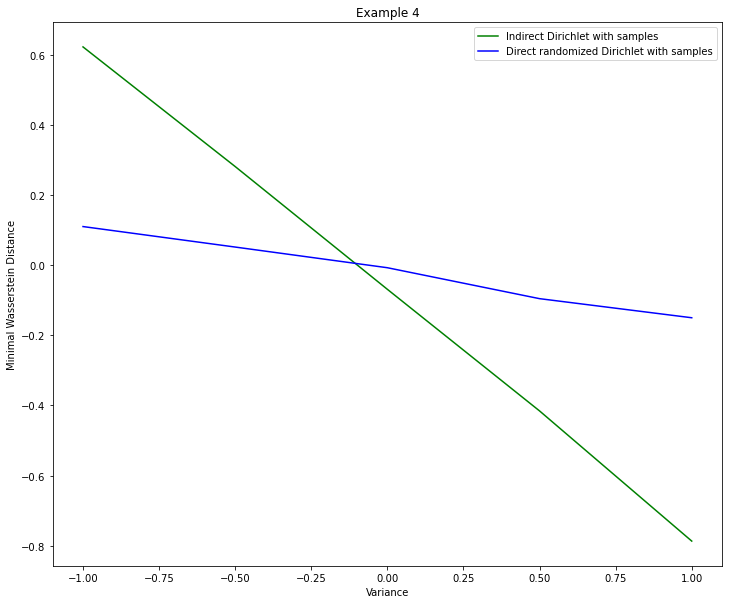

In [16]:
# Plot three curves in one graph

# Plotting the curves simultaneously
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 4")

# Adding legend
pl.legend()

# Adjust Size
pl.rcParams['figure.figsize'] = [12, 10]

# To load the display window
pl.show()

### Runtime Comparison

We will now compare the average runtime for each of the optimization methods with repect to each of the examples.

In [23]:
# Example 1.1
ex1_mr_hist = np.array(hist_method_time).mean()
ex1_var_hist = np.array(hist_method_time).var()
ex1_mr_samples = np.array(samples_method_time).mean()
ex1_var_samples = np.array(samples_method_time).var()
ex1_mr_dir = np.array(dir_method_time).mean()
ex1_var_dir = np.array(dir_method_time).var()

# Example 1.2
ex2_mr_samples = np.array(samples_method_time2).mean()
ex2_var_samples = np.array(samples_method_time2).var()
ex2_mr_dir = np.array(dir_method_time2).mean()
ex2_var_dir = np.array(dir_method_time2).var()

# Example 2.1
ex3_mr_hist = np.array(hist_method_time3).mean()
ex3_var_hist = np.array(hist_method_time3).var()
ex3_mr_samples = np.array(samples_method_time3).mean()
ex3_var_samples = np.array(samples_method_time3).var()
ex3_mr_dir = np.array(dir_method_time3).mean()
ex3_var_dir = np.array(dir_method_time3).var()


# Example 2.2
ex4_mr_samples = np.array(samples_method_time4).mean()
ex4_var_samples = np.array(samples_method_time4).var()
ex4_mr_dir = np.array(dir_method_time4).mean()
ex4_var_dir = np.array(dir_method_time4).var()


We print the table of average runtime comparison: 

In [24]:
# Table for runtime mean

#create data
data = [["Ex 1.1", ex1_mr_hist, ex1_mr_samples, ex1_mr_dir], 
        ["Ex 1.2", "-", ex2_mr_samples, ex2_mr_dir], 
        ["Ex 2.1", ex3_mr_hist, ex3_mr_samples, ex3_mr_dir], 
        ["Ex 2.2", "-", ex4_mr_samples, ex4_mr_dir]]
  
#define header names
col_names = ["Example", "'Hist'", "'Samples'", "'Direct Random'", "'Dirichlet'"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤════════════════════╤═════════════╤═══════════════════╕
│ Example   │ 'Hist'             │   'Samples' │   'Direct Random' │
╞═══════════╪════════════════════╪═════════════╪═══════════════════╡
│ Ex 1.1    │ 3.270182704925537  │     8.94749 │           33.3838 │
├───────────┼────────────────────┼─────────────┼───────────────────┤
│ Ex 1.2    │ -                  │    16.6264  │          139.136  │
├───────────┼────────────────────┼─────────────┼───────────────────┤
│ Ex 2.1    │ 3.7368773937225344 │     9.06625 │           33.6186 │
├───────────┼────────────────────┼─────────────┼───────────────────┤
│ Ex 2.2    │ -                  │    15.3533  │          130.584  │
╘═══════════╧════════════════════╧═════════════╧═══════════════════╛


We then print the table of runtime variance comparison: 

In [25]:
# Table for runtime variance

#create data
data = [["Ex 1.1", ex1_var_hist, ex1_var_samples, ex1_var_dir], 
        ["Ex 1.2", "-", ex2_var_samples, ex2_var_dir], 
        ["Ex 2.1", ex3_var_hist, ex3_var_samples, ex3_var_dir], 
        ["Ex 2.2", "-", ex4_var_samples, ex4_var_dir]]
  
#define header names
col_names = ["Example", "'Hist'", "'Samples'", "'Direct Random'", "'Dirichlet'"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════╤══════════════════════╤═════════════╤═══════════════════╕
│ Example   │ 'Hist'               │   'Samples' │   'Direct Random' │
╞═══════════╪══════════════════════╪═════════════╪═══════════════════╡
│ Ex 1.1    │ 0.008216990298810742 │   0.139329  │          0.16546  │
├───────────┼──────────────────────┼─────────────┼───────────────────┤
│ Ex 1.2    │ -                    │   0.806018  │          1.82302  │
├───────────┼──────────────────────┼─────────────┼───────────────────┤
│ Ex 2.1    │ 0.016032902584684053 │   0.0126193 │          0.179529 │
├───────────┼──────────────────────┼─────────────┼───────────────────┤
│ Ex 2.2    │ -                    │   0.0106608 │          5.65118  │
╘═══════════╧══════════════════════╧═════════════╧═══════════════════╛


For the visuals, we plot the average runtime for four methods across the four toy examples.

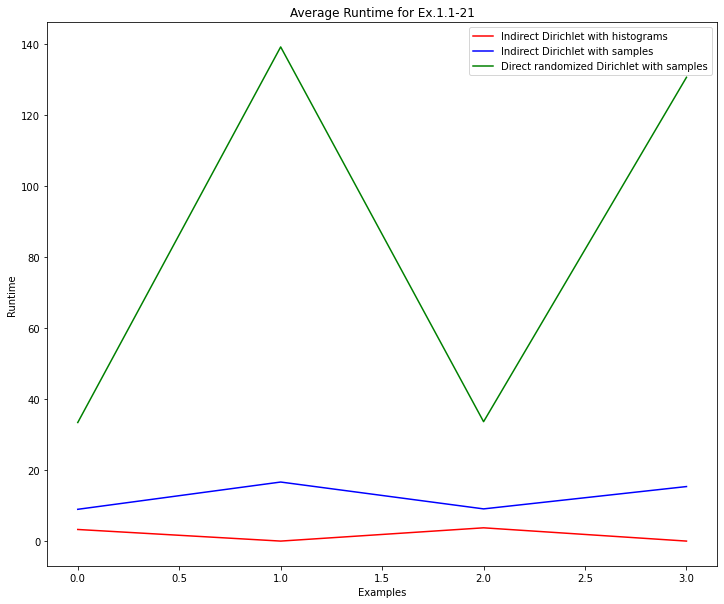

In [28]:
# plot average runtime 

X = np.arange(4) # corresponds to each example 1.1 - 2.1

# create mean runtime list
hist_method_time = [ex1_mr_hist,0,ex3_mr_hist,0] # fill empty space with 0
samples_method_time = [ex1_mr_samples,ex2_mr_samples,ex3_mr_samples,ex4_mr_samples]
dir_method_time = [ex1_mr_dir,ex2_mr_dir,ex3_mr_dir,ex4_mr_dir] 

# Plotting the curves simultaneously
pl.plot(X, hist_method_time, color='r', label='Indirect Dirichlet with histograms')
pl.plot(X, samples_method_time, color='b', label='Indirect Dirichlet with samples')
pl.plot(X, dir_method_time, color='g', label='Direct randomized Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Examples")
pl.ylabel("Runtime")
pl.title("Average Runtime for Ex.1.1-21")

# Adding legend
pl.legend()

# To load the display window
pl.show()

We also plot the runtime variance for the four methods across the four toy examples for the sake of visuals.

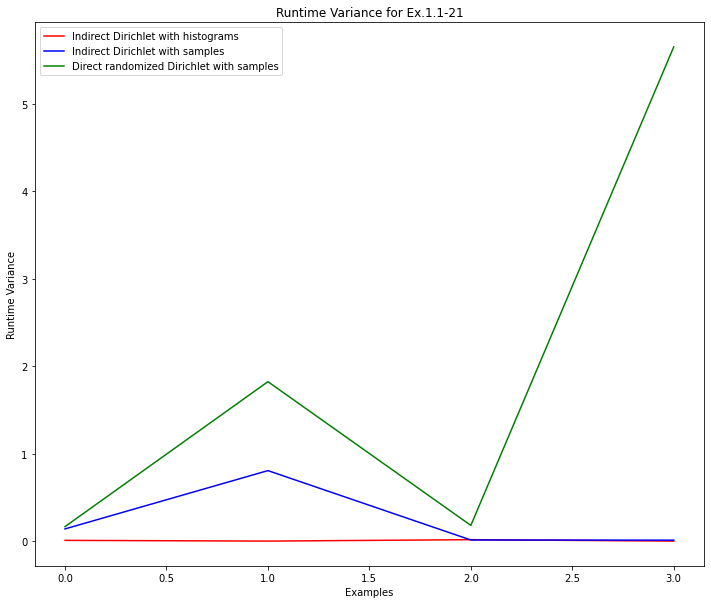

In [27]:
# plot variance 

# create variance list
hist_method_var = [ex1_var_hist,0,ex3_var_hist,0] # fill empty space with 0
samples_method_var = [ex1_var_samples,ex2_var_samples,ex3_var_samples,ex4_var_samples]
dir_method_var = [ex1_var_dir,ex2_var_dir,ex3_var_dir,ex4_var_dir]

# Plotting the curves simultaneously
pl.plot(X, hist_method_var, color='r', label='Indirect Dirichlet with histograms')
pl.plot(X, samples_method_var, color='b', label='Indirect Dirichlet with samples')
pl.plot(X, dir_method_var, color='g', label='Direct randomized Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Examples")
pl.ylabel("Runtime Variance")
pl.title("Runtime Variance for Ex.1.1-21")

# Adding legend
pl.legend()

# To load the display window
pl.show()